In [85]:
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.font_manager  
import pandas as pd
from sklearn import svm  
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn import metrics

from sklearn.metrics import roc_curve, auc, precision_recall_curve,confusion_matrix,classification_report


In [86]:
d = pd.read_csv('C:/Users/Ankush Negi/Desktop/Video Anomaly Detection in Road Accidents/CSV/Gray.csv',index_col=0)

In [87]:
d.loc[d['Class'] == 1, 'Class'] = -1
d.loc[d['Class'] == 0, 'Class'] = 1

display(d.head())

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,Class
0,0.091337,0.116164,0.082682,0.065471,0.040325,0.034460,0.041812,0.028746,0.038376,0.118293,...,0.037472,0.016945,0.030078,0.479320,0.269376,0.093853,0.070431,0.076576,0.078034,1
1,0.339148,0.426073,0.424330,0.343873,0.400055,0.398434,0.229129,0.242470,0.244308,0.209226,...,0.220796,0.224576,0.215038,0.294615,0.231862,0.194865,0.235808,0.202895,0.188064,1
2,1.169620,1.149726,1.283289,1.330018,1.377478,1.384790,1.273399,1.167964,1.199596,1.282005,...,1.133217,0.803359,0.716273,0.977331,1.306488,0.970416,0.732468,0.819460,1.175146,1
3,0.678514,0.550748,1.211692,1.164041,0.591498,0.268360,0.262265,0.786680,0.841955,0.203932,...,0.207253,0.043071,0.027644,0.729377,0.760799,0.590914,0.145336,0.130083,0.101409,1
4,0.814380,0.860416,0.717146,0.605213,0.522557,0.419437,0.322370,0.348295,0.648754,0.534378,...,0.414965,0.420689,0.430630,0.549334,0.708087,0.599063,0.549627,0.393857,0.356781,1


In [88]:
data = d
mask = (data['Class'] == 1)

X_train, X_test = train_test_split(data[mask], test_size=0.2, random_state=0)
X_train = X_train.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_fraud = data[~mask].drop(['Class'], axis=1)

x_test=np.vstack((X_test,X_fraud))
y_test=[1]*len(X_test)+[-1]*len(X_fraud)


In [89]:
clf = svm.OneClassSVM(kernel='rbf',nu=0.6)  
clf.fit(X_train)  

y_pred = clf.predict(x_test)  
y_prob = clf.decision_function(x_test)  # the lower, the more normal

fpr,tpr,threshold_svc = metrics.roc_curve(y_test,y_prob)     
auc_svc = metrics.auc(fpr,tpr)   

precision, recall, _ = precision_recall_curve(y_test,y_prob)
pr_auc = auc(recall, precision)

score_svc = metrics.accuracy_score(y_test,y_pred)

print(score_svc)
print(classification_report(y_test, y_pred))

0.75177304964539
              precision    recall  f1-score   support

          -1       0.79      0.88      0.84       101
           1       0.59      0.42      0.49        40

    accuracy                           0.75       141
   macro avg       0.69      0.65      0.66       141
weighted avg       0.74      0.75      0.74       141



C:\Users\Ankush Negi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(
C:\Users\Ankush Negi\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but OneClassSVM was fitted with feature names
  warnings.warn(


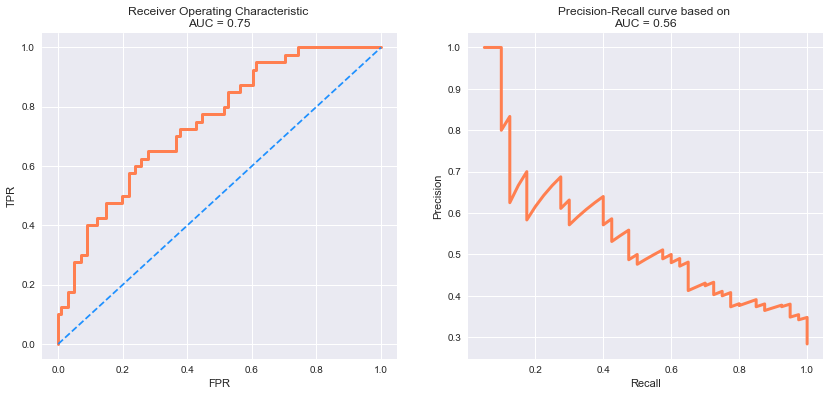

In [91]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
#plt.figure(figsize=(14, 6))
plt.title('Receiver Operating Characteristic \nAUC = %0.2f'% auc_svc)   
plt.plot(fpr, tpr, c='coral', lw=3)
plt.plot([0,1],[0,1], c='dodgerblue', ls='--')
plt.ylabel('TPR'); plt.xlabel('FPR')

plt.subplot(122)
plt.title('Precision-Recall curve based on \nAUC = %0.2f'% pr_auc)
plt.plot(recall[:-2], precision[:-2], c='coral', lw=3)
plt.xlabel('Recall'); plt.ylabel('Precision')
plt.show()